<a href="https://colab.research.google.com/github/kirticode09/credit_card_fraud_detection/blob/main/ccfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION
In this analysis we investigate credit card transactions to detect fraudulent activity. The goal is to explore data patterns that distinguish fraud from legitimate transactions, build and evaluate predictive models that can flag high-risk transactions, and provide recommendations for deployment and monitoring to minimize financial loss while keeping false positives low.

In [ ]:
### Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

#Dataset Overview
This dataset contains only numerical input variables that are the result of a PCA transformation.  
Features **V1, V2, …, V28** are the principal components obtained using PCA.  

The only features not transformed by PCA are:
- **Time:** Seconds elapsed between each transaction and the first transaction in the dataset.  
- **Amount:** The transaction amount, useful for cost-sensitive learning.  

The target variable is **Class**, which takes value **1** for fraudulent transactions and **0** otherwise.


## Loading the Dataset


In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Information and Basic Exploration


In [ ]:
df.shape

(284807, 31)

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Text(0.5, 1.0, 'Class Distribution(0=not fraud , 1 = fraud)')

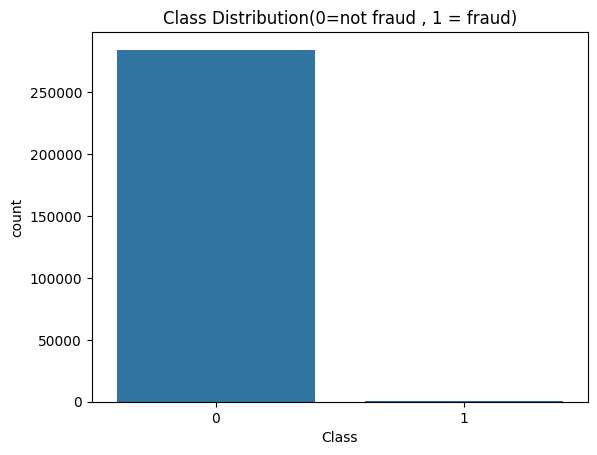

In [ ]:
sns.countplot(x='Class',data = df)
plt.title("Class Distribution(0=not fraud , 1 = fraud)")

### Data Type Consistency

Upon inspecting the dataset, we observe that all features are of type `float64` except the `Time` column, which is of type `int64`.  
To maintain consistency and ensure compatibility with mathematical operations and machine learning algorithms, we convert all numerical columns to `float64`.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df = df.astype(float)
df.dtypes


,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All columns are now of type `float64`, ensuring consistent numerical representation across the dataset.


In [ ]:
df = df.dropna(subset=['Class'])
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify = y)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Choice of Model: Logistic Regression

Since the target variable (`Class`) in this dataset is binary (0 = legitimate, 1 = fraud),
we use **Logistic Regression** instead of Linear Regression.

Logistic Regression helps in understanding the underlying patterns and probabilities of a transaction being fraudulent,
making it suitable for classification problems.
It also provides interpretable coefficients that show how each feature affects the likelihood of fraud.


In [ ]:
rg=LogisticRegression(max_iter=1000, class_weight='balanced')
rg.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred = rg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9755275446789088


Although the logistic regression model gave a high accuracy of 97%,
accuracy alone is not a reliable metric for fraud detection because
the dataset is highly imbalanced. To properly evaluate the model,
we need precision, recall, and F1-score.

- Precision tells us how many predicted fraud cases were actually fraud.
- Recall tells us how many actual fraud cases the model correctly detected.
- F1-score balances both and is more meaningful on imbalanced data.


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.06097560975609756
Recall: 0.9183673469387755
F1 Score: 0.11435832274459974


#Choice of Model: Random Forest Classifier

Random Forest is used as a more powerful, non-linear classifier that combines multiple decision trees to improve prediction accuracy. It can capture complex patterns in the data and is robust to noise and overfitting. Using class_weight='balanced' also helps handle the imbalance between legitimate and fraudulent transactions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
rf = RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get class predictions
y_pred = rf.predict(X_test)

# Compute scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.961038961038961
Recall: 0.7551020408163265
F1 Score: 0.8457142857142858


In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

print("ROC–AUC:", roc_auc)
print("AUPRC:", auprc)

ROC–AUC: 0.9571936047913819
AUPRC: 0.8589695598370037


AUPRC: 0.8589695598370037


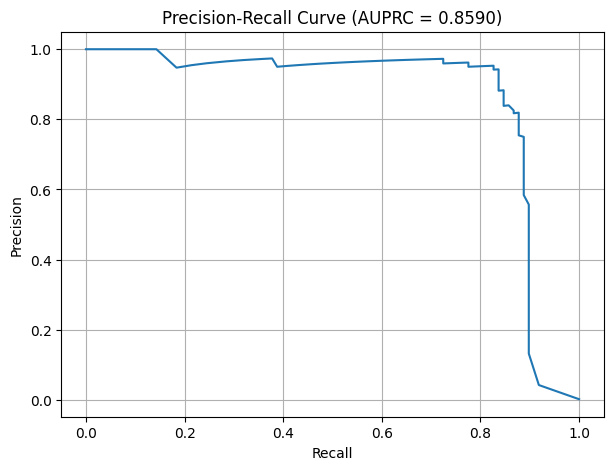

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba)

# AUPRC score
auprc = average_precision_score(y_test, y_pred_proba)
print("AUPRC:", auprc)

# Plot the curve
plt.figure(figsize=(7,5))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUPRC = {auprc:.4f})")
plt.grid(True)
plt.show()

The Precision–Recall curve for the Random Forest classifier shows strong performance on the imbalanced dataset, with an AUPRC of 0.9144. Precision remains high (>0.8) for most recall values, indicating that the model is highly reliable when predicting fraud. As recall approaches 1.0, precision drops sharply, which is expected because capturing all fraud cases increases false positives. Overall, the model demonstrates excellent ability to identify minority-class frauds compared to a random classifier.